In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import powerlaw

In [94]:

list(d.keys())

['sample_0',
 'sample_1',
 'sample_2',
 'sample_3',
 'sample_4',
 'sample_5',
 'meta_data']

In [183]:
file_name = 'knn_stringer_1dt_Krebs_50windowsize'
d = np.load(f'./results/knn/k5_window_50_epsilon_0.0/{file_name}.npz', 
            allow_pickle=True)

In [184]:
d['sample_0'].item().keys()

dict_keys(['avg_min_dist_to_preceding', 'avg_min_dist_to_preceding_random', 'avg_min_dist_to_preceding_gauss', 'avg_min_dist_to_following', 'avg_min_dist_to_following_random', 'avg_min_dist_to_following_gauss'])

In [185]:
sample = 'sample_0'
prec = [0] * d['meta_data'].item()['window_size']
prec.extend(list(d[sample].item()['avg_min_dist_to_preceding'].squeeze()))
prec = np.array(prec)

foll = list(d[sample].item()['avg_min_dist_to_following'].squeeze())
foll.extend([0] * d['meta_data'].item()['window_size'])
foll = np.array(foll)

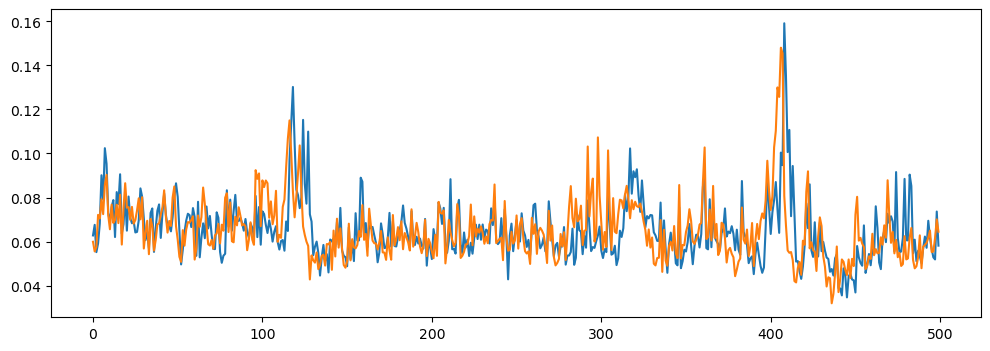

In [186]:
start, end = 100, 600
plt.figure(figsize=(12, 4))
plt.plot(prec[start:end])
plt.plot(foll[start:end])

In [187]:
prec_rand, foll_rand = [], []
for preceeding, following in zip(d[sample].item()['avg_min_dist_to_preceding_random'].squeeze(), 
                                 d[sample].item()['avg_min_dist_to_following_random'].squeeze()):
    
    prec_ = [0] * d['meta_data'].item()['window_size']
    prec_.extend(list(preceeding))
    prec_rand.append(prec_)

    foll_ = list(following)
    foll_.extend([0] * d['meta_data'].item()['window_size'])
    foll_rand.append(foll_)
prec_rand = np.array(prec_rand)
foll_rand = np.array(foll_rand)

In [191]:
foll_rand.shape

(10, 781)

In [194]:
prec_rand[0], 

(array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.04423747e+00, -5.92452889e-01,
        -1.1

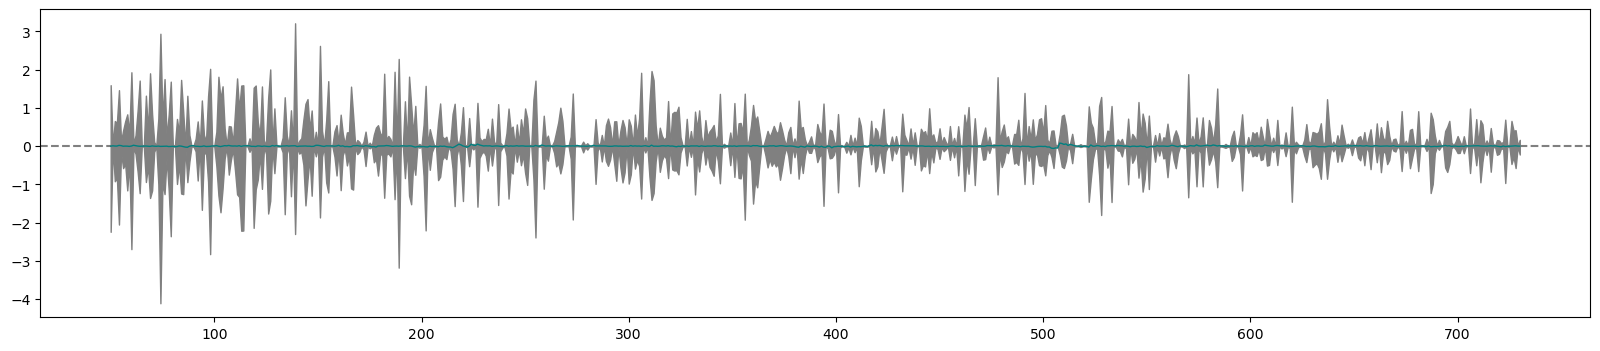

In [190]:
start, end = d['meta_data'].item()['window_size'], len(foll)-d['meta_data'].item()['window_size']
plt.figure(figsize=(20, 4))



plt.plot(np.arange(start,end), prec[start:end] - foll[start:end], c='teal', lw=1, zorder=10)
plt.axhline(0, ls='--', c='gray')

mean_diff_rand = np.nanmean(prec_rand - foll_rand, axis=0)[start:end]
std_diff_rand = np.nanstd(prec_rand - foll_rand, axis=0)[start:end]
plt.fill_between(np.arange(start,end), mean_diff_rand- 2*std_diff_rand, mean_diff_rand + 2*std_diff_rand, 
                 color='gray', alpha=1, zorder=1)



<AxesSubplot:ylabel='Density'>

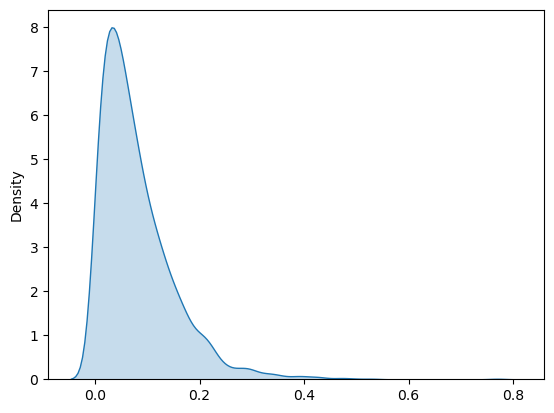

In [110]:
sns.kdeplot(data=np.abs(prec[start:end] - foll[start:end]), fill=True, common_norm=False, palette="crest",)

Text(0.5, 1.0, 'Stringer Robbins')

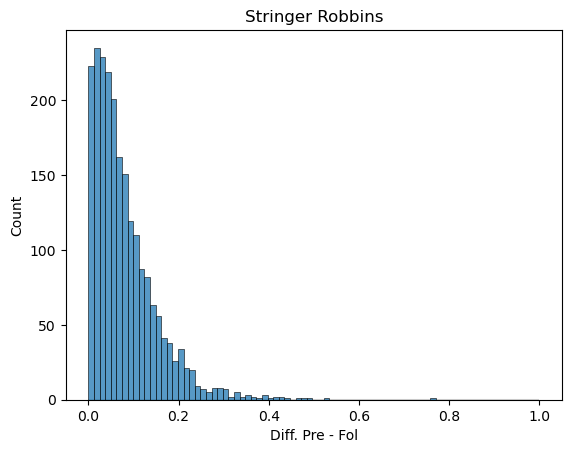

In [111]:
sns.histplot(data=np.abs(prec_rand[:, start:end].ravel() - foll_rand[:, start:end].ravel()), 
              color="lightgray", fill=False)
sns.histplot(data=np.abs(prec[start:end] - foll[start:end]), fill=True, common_norm=False, palette="crest")

plt.xlabel('Diff. Pre - Fol')
plt.title('Stringer Robbins')

In [121]:
res_dir = './results/knn/k5_window_20_epsilon_0.0/'
files = sorted([f for f in os.listdir(res_dir) if f != '.DS_Store'])

for file in files:
    d = np.load(f'./results/knn/k5_window_20_epsilon_0.0/{file}', allow_pickle=True)
    for sample in list(d.keys()):
        if sample == 'meta_data':
            continue
        
        print(file, sample)
        prec = [0] * d['meta_data'].item()['window_size']
        prec.extend(list(d[sample].item()['avg_min_dist_to_preceding'][0]))
        prec = np.array(prec)

        foll = list(d[sample].item()['avg_min_dist_to_following'][0])
        foll.extend([0] * d['meta_data'].item()['window_size'])
        foll = np.array(foll)

        diff = (prec[start:end] - foll[start:end])
        diff[np.isnan(diff)] = 0


        results = powerlaw.Fit(np.abs(diff))
        print(f"Alpha: {results.power_law.alpha}")
        print(f"Xmin: {results.power_law.xmin}")
        # alpha: The scaling parameter of the power law.
        # xmin: The minimum value from which the data follows a power law.

        R, p = results.distribution_compare('power_law', 'exponential')
        # R: A positive value suggests the power-law model fits better than the alternative.
        # p: If p < 0.05, the difference between the models is statistically significant.
        print(f"Log-likelihood ratio (R): {R}")
        print(f"P-value: {p}")
        
        print('')
        print('')

# results.plot_pdf(color='b', linewidth=2)
# results.power_law.plot_pdf(color='r', linestyle='--', linewidth=2)

# plt.legend(["Data", "Power-law fit"])
# plt.show()

# ks_stat = results.power_law.KS()
# print(f"KS Statistic: {ks_stat}")

knn_ferret_10dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit
Alpha: 3.236912132520625
Xmin: 0.15912069330692058
Log-likelihood ratio (R): -0.673778826720286
P-value: 0.8293490218940494


knn_ferret_11dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit
Alpha: 3.335713157292224
Xmin: 0.19117577988598777
Log-likelihood ratio (R): -0.4447260914990132
P-value: 0.8470591112220228




knn_ferret_12dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit
Alpha: 2.8987716681905473
Xmin: 0.1253472343685278
Log-likelihood ratio (R): 0.95632402910942
P-value: 0.7816240867413123


knn_ferret_13dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit
Alpha: 2.7800136388045273
Xmin: 0.12611628584469003
Log-likelihood ratio (R): -0.32594696217307906
P-value: 0.9236136350284141


knn_ferret_14dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit


Alpha: 2.623091352517199
Xmin: 0.10915018754626937
Log-likelihood ratio (R): 1.3992747307291897
P-value: 0.6851245708147818


knn_ferret_15dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit
Alpha: 2.598152246661897
Xmin: 0.10175206094219014
Log-likelihood ratio (R): 4.240399357861348
P-value: 0.28201389235609475


knn_ferret_16dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit


Alpha: 2.5403834262062683
Xmin: 0.11412182461326081
Log-likelihood ratio (R): -0.5073246292050722
P-value: 0.8723772576991022


knn_ferret_17dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit
Alpha: 2.2586787324973345
Xmin: 0.06751629658331171
Log-likelihood ratio (R): 4.831564248014697
P-value: 0.34081660161189065


knn_ferret_1dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit


Alpha: 6.037117982031992
Xmin: 0.25186946663901
Log-likelihood ratio (R): 1.667019340662243
P-value: 0.22224624551047478


knn_ferret_2dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 7.638486950053961
Xmin: 0.3636288920143443
Log-likelihood ratio (R): 0.7030633841909554
P-value: 0.5081083868871917


knn_ferret_3dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit


Alpha: 6.875851526612821
Xmin: 0.5174540168105285
Log-likelihood ratio (R): -0.8851704622567933
P-value: 0.2861867253586792


knn_ferret_4dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit


Alpha: 13.221113437068832
Xmin: 0.6975348022803523
Log-likelihood ratio (R): 0.25741842519365876
P-value: 0.38566641932728574


knn_ferret_5dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit


Alpha: 6.956584029925502
Xmin: 0.3468984942278409
Log-likelihood ratio (R): 0.6389373179166384
P-value: 0.41623428373022875


knn_ferret_6dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 6.859453677396787
Xmin: 0.4238117362064182
Log-likelihood ratio (R): 0.010611434558682659
P-value: 0.9808709459716702


knn_ferret_7dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit


Alpha: 5.637857374960147
Xmin: 0.30028383595987174
Log-likelihood ratio (R): 0.00997653448201996
P-value: 0.9916068978181466


knn_ferret_8dtbeforeEO_awake_Orig.npz sample_0
Calculating best minimal value for power law fit
Alpha: 4.39873472398021
Xmin: 0.2510782438282687
Log-likelihood ratio (R): -1.404315479763517
P-value: 0.39247424859910063


knn_ferret_9dtbeforeEO_awake_Orig.npz sample_0


Calculating best minimal value for power law fit
Alpha: 3.727871645782168
Xmin: 0.2026632562116698
Log-likelihood ratio (R): -0.2907008249988856
P-value: 0.8991800688151497


knn_monkey_1dt.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 4.935175013932916
Xmin: 0.15009744798936842
Log-likelihood ratio (R): 13.238391120448496
P-value: 0.0207677856726921


knn_monkey_1dt.npz sample_1
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 4.612521333617721
Xmin: 0.1893474862949141
Log-likelihood ratio (R): 0.9065853844049325
P-value: 0.7708199255790685


knn_monkey_1dt.npz sample_2
Calculating best minimal value for power law fit


Alpha: 4.858318368574076
Xmin: 0.08190096758619109
Log-likelihood ratio (R): 18.92443817449615
P-value: 0.0024823251674516962


knn_monkey_1dt.npz sample_3


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Alpha: 5.089048212272904
Xmin: 0.11944382627613814
Log-likelihood ratio (R): 2.1228368895329504
P-value: 0.6991931857916176


knn_monkey_1dt.npz sample_4
Calculating best minimal value for power law fit
Alpha: 4.708357130735552
Xmin: 0.10522102578365822
Log-likelihood ratio (R): -29.279198892358867
P-value: 3.1607794727854993e-07


knn_monkey_1dt.npz sample_5
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 5.393773450080476
Xmin: 0.2121256903081784
Log-likelihood ratio (R): 3.711904112258948
P-value: 0.18093229781584275


knn_stringer_1dt_Krebs_20windowsize.npz sample_0
Calculating best minimal value for power law fit
Alpha: 2.338966008090971
Xmin: 2.0455571184797434
Log-likelihood ratio (R): 29.316086987592577
P-value: 0.003241023938817799


knn_stringer_1dt_Krebs_20windowsize_CP.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.9421470228397126
Xmin: 0.06578498418400258
Log-likelihood ratio (R): 6.235564502496009
P-value: 0.17840816224503708


knn_stringer_1dt_Krebs_20windowsize_FrMoCtx.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.08939981414827
Xmin: 0.04588988720483839
Log-likelihood ratio (R): 16.289206732255884
P-value: 0.10670314227325417


knn_stringer_1dt_Krebs_20windowsize_HPF.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.8781464653264686
Xmin: 0.021867429871223212
Log-likelihood ratio (R): 31.572842943827524
P-value: 0.04473140711508732


knn_stringer_1dt_Krebs_20windowsize_LS.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.9220877021532505
Xmin: 0.045847026417554976
Log-likelihood ratio (R): 7.4254849502678075
P-value: 0.2061432832633323


knn_stringer_1dt_Krebs_20windowsize_MB.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.5761725366414647
Xmin: 0.016252224995110573
Log-likelihood ratio (R): 66.69365289780919
P-value: 0.029697087314262332


knn_stringer_1dt_Krebs_20windowsize_SC.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.8019844894705503
Xmin: 0.047062257965436435
Log-likelihood ratio (R): 26.67686712234154
P-value: 0.0019219655034091693


knn_stringer_1dt_Krebs_20windowsize_SomMoCtx.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.5800492750271937
Xmin: 0.05683925612556938
Log-likelihood ratio (R): -0.4132046578867923
P-value: 0.9131651518543321


knn_stringer_1dt_Krebs_20windowsize_TH.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.7243420184645535
Xmin: 0.01571927787884389
Log-likelihood ratio (R): 152.29345767714187
P-value: 4.41836743745123e-05


knn_stringer_1dt_Krebs_20windowsize_V1.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.3689446705454666
Xmin: 0.04207466309784452
Log-likelihood ratio (R): 25.303272350348603
P-value: 0.001053049216641582


knn_stringer_1dt_Robbins_20windowsize.npz sample_0


Calculating best minimal value for power law fit
Alpha: 3.433153380380649
Xmin: 0.03136670053793453
Log-likelihood ratio (R): 35.00649881470159
P-value: 4.495662898394899e-05


knn_stringer_1dt_Robbins_20windowsize_CP.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.5354727300868265
Xmin: 0.039526946331722546
Log-likelihood ratio (R): -10.03542895681096
P-value: 0.12930346630940218


knn_stringer_1dt_Robbins_20windowsize_FrMoCtx.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 4.956950517312613
Xmin: 0.06936634776246044
Log-likelihood ratio (R): 2.758638585401987
P-value: 0.26579772379351463


knn_stringer_1dt_Robbins_20windowsize_HPF.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.8901902348341504
Xmin: 0.04410086444064279
Log-likelihood ratio (R): 9.609527863467264
P-value: 0.03947291589146286


knn_stringer_1dt_Robbins_20windowsize_LH.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.285480777536595
Xmin: 0.002945347084026162
Log-likelihood ratio (R): 86.17946502812866
P-value: 2.1278087198770552e-05


knn_stringer_1dt_Robbins_20windowsize_LS.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.5569870021314425
Xmin: 0.0712826454533727
Log-likelihood ratio (R): 8.935070377352657
P-value: 0.13440959762476806


knn_stringer_1dt_Robbins_20windowsize_RSP.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 7.312636968647935
Xmin: 0.06649295566789735
Log-likelihood ratio (R): 0.42444133739664913
P-value: 0.5354065848606725


knn_stringer_1dt_Robbins_20windowsize_SomMoCtx.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.915275646316636
Xmin: 0.074882337211707
Log-likelihood ratio (R): -19.49826447097157
P-value: 0.01042880111312951


knn_stringer_1dt_Robbins_20windowsize_TH.npz sample_0
Calculating best minimal value for power law fit


Alpha: 3.534073011930232
Xmin: 0.03210962109635809
Log-likelihood ratio (R): 38.6425515127958
P-value: 3.4750223993431985e-06


knn_stringer_1dt_Waksman_20windowsize.npz sample_0
Calculating best minimal value for power law fit
Alpha: 3.236727618324816
Xmin: 0.02504927679367497
Log-likelihood ratio (R): 66.42510561939625
P-value: 4.930133201366458e-07


knn_stringer_1dt_Waksman_20windowsize_FrCtx.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 4.067635519844752
Xmin: 0.10226268678110165
Log-likelihood ratio (R): -1.6237037836162385
P-value: 0.5549094824497811


knn_stringer_1dt_Waksman_20windowsize_FrMoCtx.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.517983140802047
Xmin: 0.03838921997596928
Log-likelihood ratio (R): 24.203470045332494
P-value: 0.033402634605708546


knn_stringer_1dt_Waksman_20windowsize_HPF.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.773552773169249
Xmin: 0.02029752485357937
Log-likelihood ratio (R): 51.738348441581714
P-value: 2.4513279288387096e-05


knn_stringer_1dt_Waksman_20windowsize_LS.npz sample_0
Calculating best minimal value for power law fit
Alpha: 2.4781754384004318
Xmin: 0.013972872034310552
Log-likelihood ratio (R): 146.29309608324468
P-value: 8.33450652678182e-14


knn_stringer_1dt_Waksman_20windowsize_MB.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.419154822537212
Xmin: 0.01487406433867957
Log-likelihood ratio (R): 62.56544718894081
P-value: 0.12416855109451047


knn_stringer_1dt_Waksman_20windowsize_RSP.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 4.009193704529707
Xmin: 0.03333358381397768
Log-likelihood ratio (R): 11.572667859794588
P-value: 0.05973970714930714


knn_stringer_1dt_Waksman_20windowsize_SC.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.7986928881708986
Xmin: 0.02087087717305107
Log-likelihood ratio (R): 22.017883810281
P-value: 0.26957673451251907


knn_stringer_1dt_Waksman_20windowsize_SSCtx.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 5.829000362729536
Xmin: 0.11726474821558704
Log-likelihood ratio (R): 1.2279584224766733
P-value: 0.4682692511797011


knn_stringer_1dt_Waksman_20windowsize_SomMoCtx.npz sample_0
Calculating best minimal value for power law fit
Alpha: 3.46547345715364
Xmin: 0.027073576734465823
Log-likelihood ratio (R): 12.784031552739359
P-value: 0.11187219291957266


knn_stringer_1dt_Waksman_20windowsize_TH.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.485937676856371
Xmin: 0.023338612147491222
Log-likelihood ratio (R): 61.759469727189554
P-value: 1.7362740406400325e-05


knn_stringer_1dt_Waksman_20windowsize_V1.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.659698531478315
Xmin: 0.03449234547398934
Log-likelihood ratio (R): 15.538456124610331
P-value: 0.15173306502879824


knn_stringer_1dt_Waksman_20windowsize_V2.npz sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.498223547867108
Xmin: 0.028097836945206206
Log-likelihood ratio (R): 12.72419205844472
P-value: 0.09502938179383268




In [143]:
file_name = 'knn_stringer_1dt_Krebs_20windowsize_TH'
d = np.load(f'./results/knn/k5_window_20_epsilon_0.0/{file_name}.npz', 
            allow_pickle=True)
area_labels = d['meta_data'].item()['area_labels']

KeyError: 'area_labels'

In [145]:
d['meta_data'].item().keys()

dict_keys(['data_set', 'n_shuffles', 'dt', 'n_samples', 'min_frames', 'steps', 'knn_epsilon', 'roi', 'animal_name', 'window_size_stringer', 'HZ', 'k', 'window_size'])

knn_stringer_1dt_Krebs_20windowsize sample_0
Calculating best minimal value for power law fit


Alpha: 2.338966008090971
Xmin: 2.0455571184797434
Log-likelihood ratio (R): 29.316086987592577
P-value: 0.003241023938817799




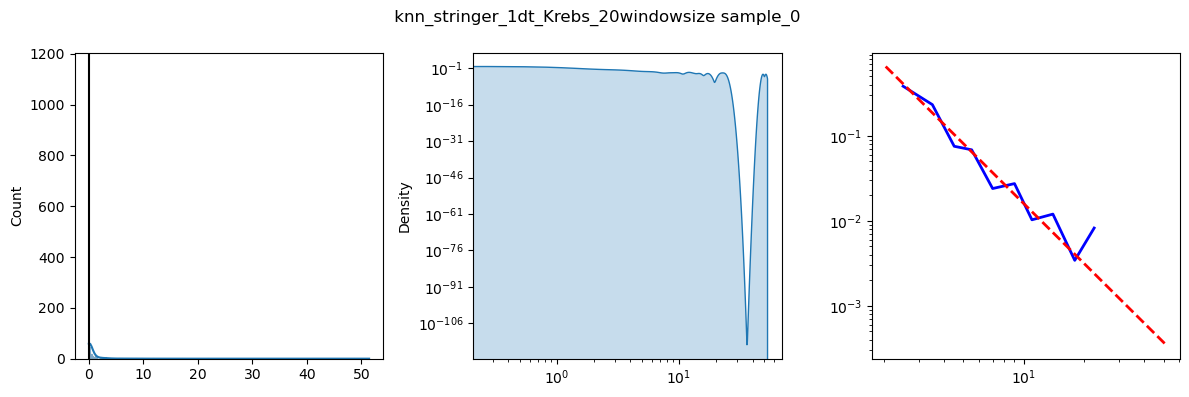

knn_stringer_1dt_Krebs_20windowsize_FrMoCtx sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.08939981414827
Xmin: 0.04588988720483839
Log-likelihood ratio (R): 16.289206732255884
P-value: 0.10670314227325417




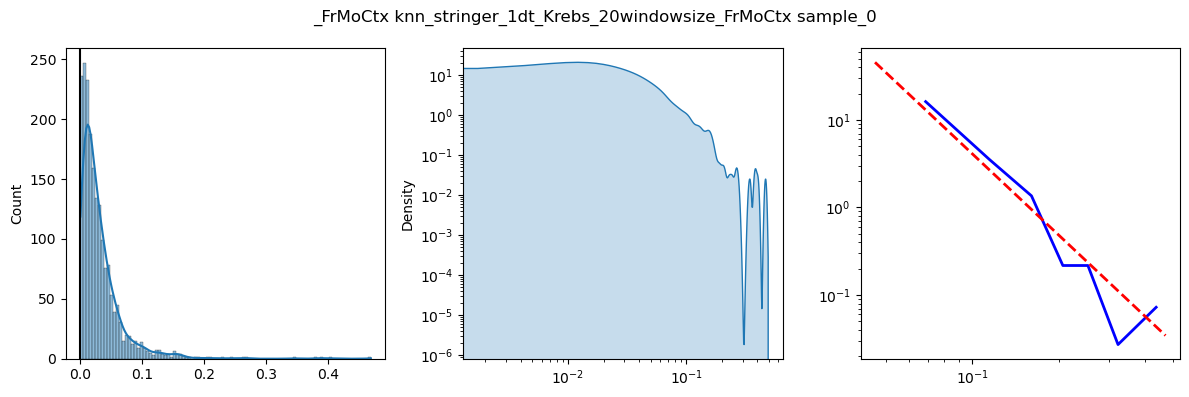

knn_stringer_1dt_Krebs_20windowsize_SomMoCtx sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.5800492750271937
Xmin: 0.05683925612556938
Log-likelihood ratio (R): -0.4132046578867923
P-value: 0.9131651518543321




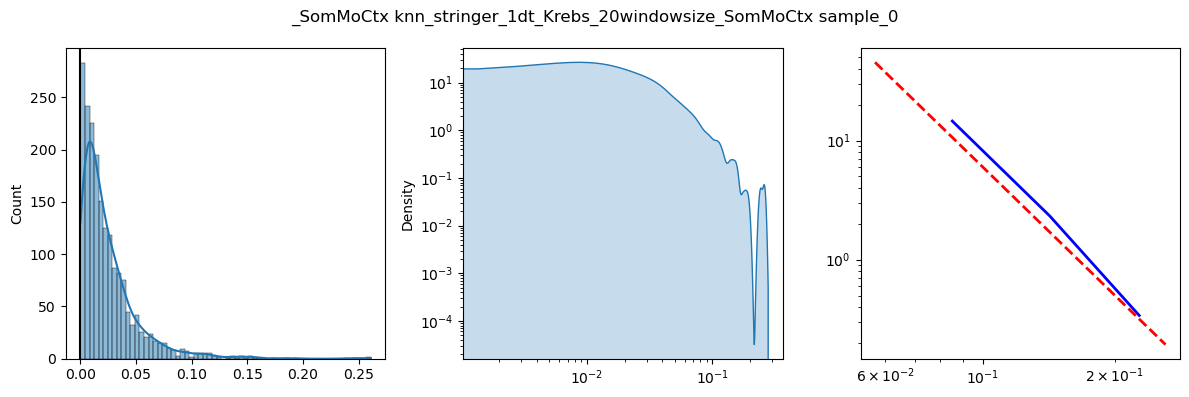

knn_stringer_1dt_Krebs_20windowsize_V1 sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.3689446705454666
Xmin: 0.04207466309784452
Log-likelihood ratio (R): 25.303272350348603
P-value: 0.001053049216641582




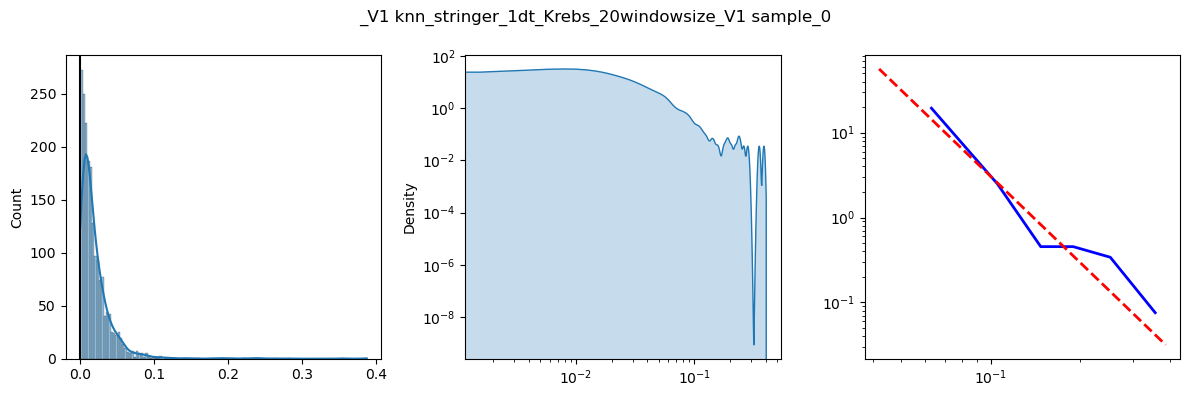

knn_stringer_1dt_Krebs_20windowsize_CP sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.9421470228397126
Xmin: 0.06578498418400258
Log-likelihood ratio (R): 6.235564502496009
P-value: 0.17840816224503708




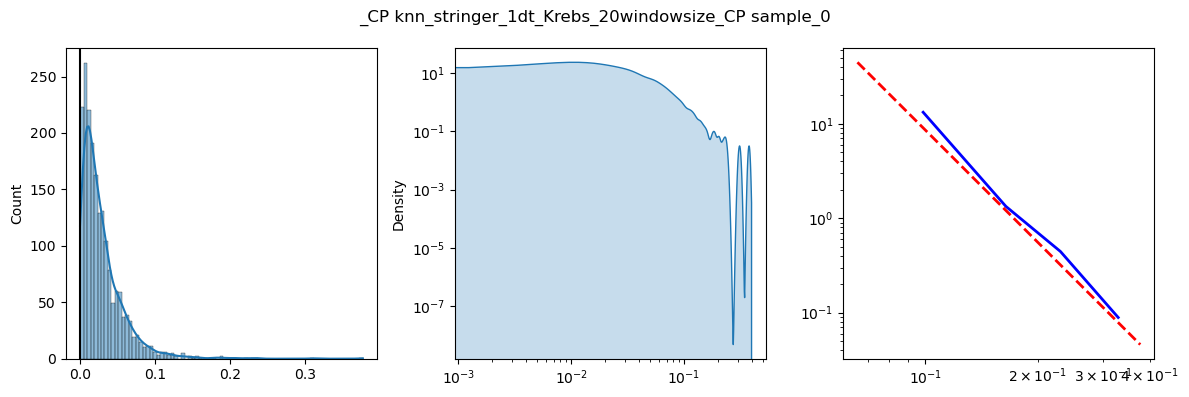

knn_stringer_1dt_Krebs_20windowsize_LS sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.9220877021532505
Xmin: 0.045847026417554976
Log-likelihood ratio (R): 7.4254849502678075
P-value: 0.2061432832633323




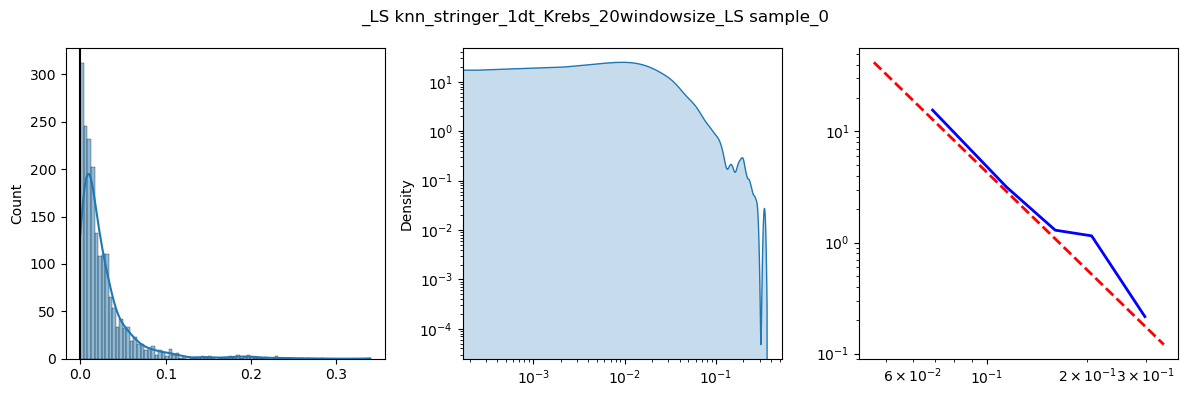

knn_stringer_1dt_Krebs_20windowsize_HPF sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.8781464653264686
Xmin: 0.021867429871223212
Log-likelihood ratio (R): 31.572842943827524
P-value: 0.04473140711508732




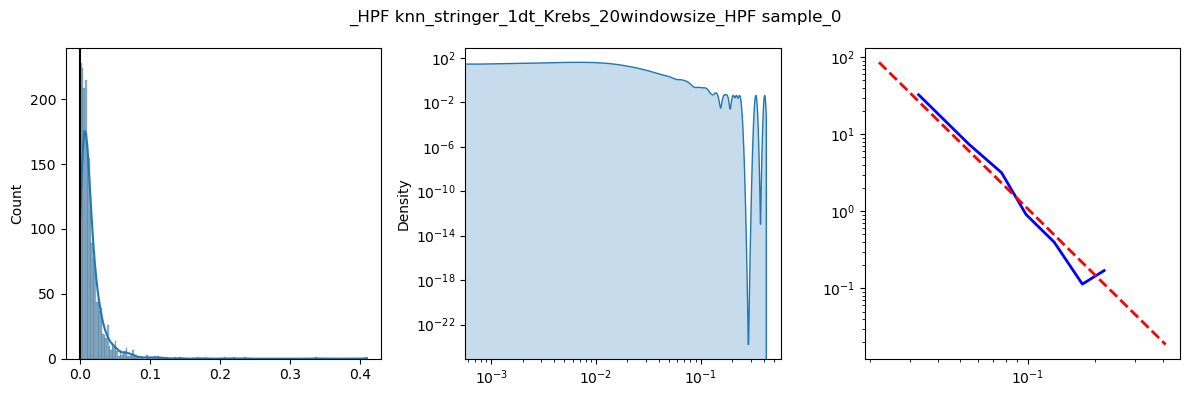

knn_stringer_1dt_Krebs_20windowsize_TH sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.7243420184645535
Xmin: 0.01571927787884389
Log-likelihood ratio (R): 152.29345767714187
P-value: 4.41836743745123e-05




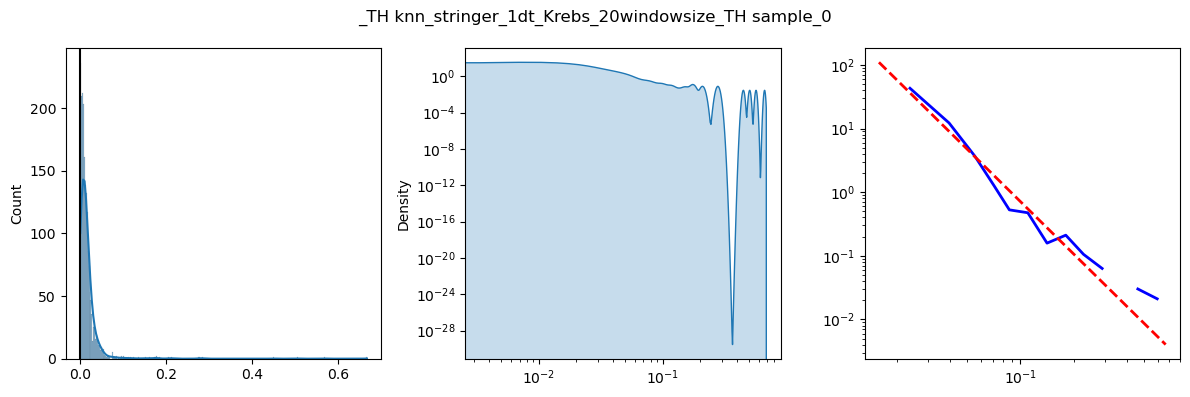

knn_stringer_1dt_Krebs_20windowsize_SC sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 2.8019844894705503
Xmin: 0.047062257965436435
Log-likelihood ratio (R): 26.67686712234154
P-value: 0.0019219655034091693




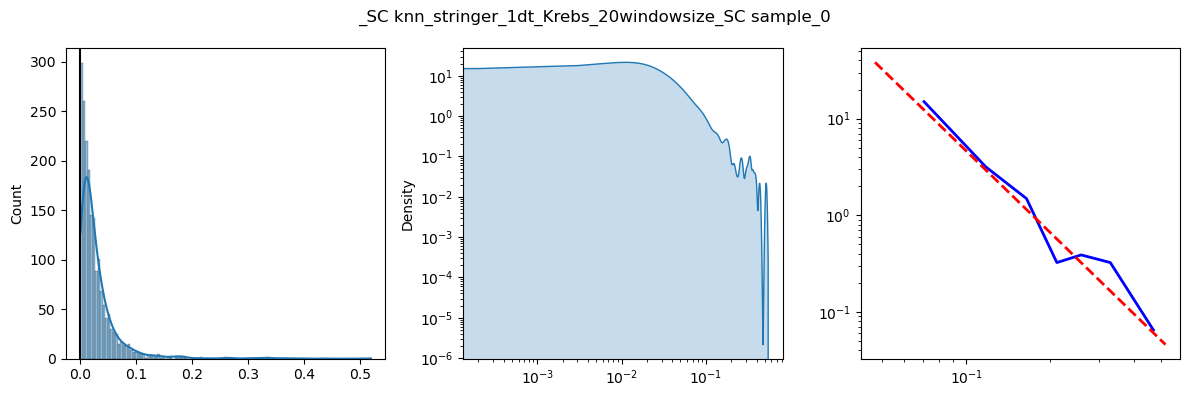

knn_stringer_1dt_Krebs_20windowsize_MB sample_0
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Alpha: 3.5761725366414647
Xmin: 0.016252224995110573
Log-likelihood ratio (R): 66.69365289780919
P-value: 0.029697087314262332




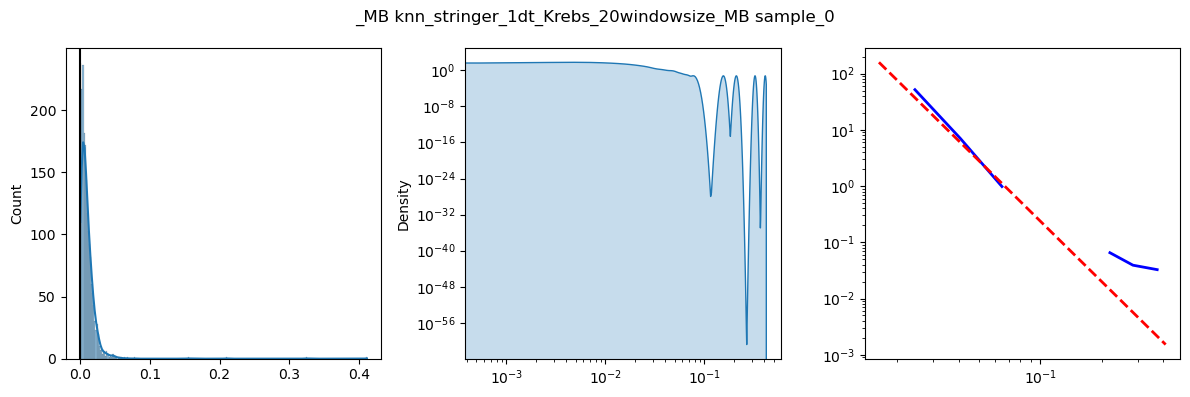

In [148]:
# file_name = 'knn_stringer_1dt_Krebs_20windowsize_TH' # knn_monkey_1dt
# mice = ['Krebs',  'Robbins', 'Waksman']
area_labels_stringer = ['', '_FrCtx', '_FrMoCtx', '_SomMoCtx', '_SSCtx', '_V1', '_V2', '_RSP', '_CP', '_LS', 
                        '_LH', '_HPF', '_TH', '_SC', '_MB']
mouse = 'Krebs'
for area_label in area_labels_stringer:
    file_name = f'knn_stringer_1dt_{mouse}_20windowsize{area_label}'
    try:
        d = np.load(f'./results/knn/k5_window_20_epsilon_0.0/{file_name}.npz', 
                    allow_pickle=True)
    except FileNotFoundError:
        continue
    for sample in list(d.keys()):
        if sample == 'meta_data':
            continue


        print(file_name, sample)
        prec = [0] * d['meta_data'].item()['window_size']
        prec.extend(list(d[sample].item()['avg_min_dist_to_preceding'][0]))
        prec = np.array(prec)

        foll = list(d[sample].item()['avg_min_dist_to_following'][0])
        foll.extend([0] * d['meta_data'].item()['window_size'])
        foll = np.array(foll)

        diff = (prec[start:end] - foll[start:end])
        diff[np.isnan(diff)] = 0


        results = powerlaw.Fit(np.abs(diff))
        print(f"Alpha: {results.power_law.alpha}")
        print(f"Xmin: {results.power_law.xmin}")
        # alpha: The scaling parameter of the power law.
        # xmin: The minimum value from which the data follows a power law.

        R, p = results.distribution_compare('power_law', 'exponential')
        # R: A positive value suggests the power-law model fits better than the alternative.
        # p: If p < 0.05, the difference between the models is statistically significant.
        print(f"Log-likelihood ratio (R): {R}")
        print(f"P-value: {p}")

        print('')
        print('')

        fig, axs = plt.subplots(figsize=(12, 4), ncols=3)
        sns.histplot(data=np.abs(prec[start:end] - foll[start:end]), fill=True, common_norm=False, ax=axs[0], 
                   kde=True)
        axs[0].axvline(0, c='k')
        sns.kdeplot(data=np.abs(prec[start:end] - foll[start:end]), fill=True, common_norm=False, ax=axs[1])
        axs[1].set_yscale('log')
        axs[1].set_xscale('log')
        results.plot_pdf(color='b', linewidth=2, ax=axs[2])
        results.power_law.plot_pdf(color='r', linestyle='--', linewidth=2, ax=axs[2])
        plt.suptitle(f'{area_label} {file_name} {sample}')
        plt.tight_layout()
        plt.show()
    

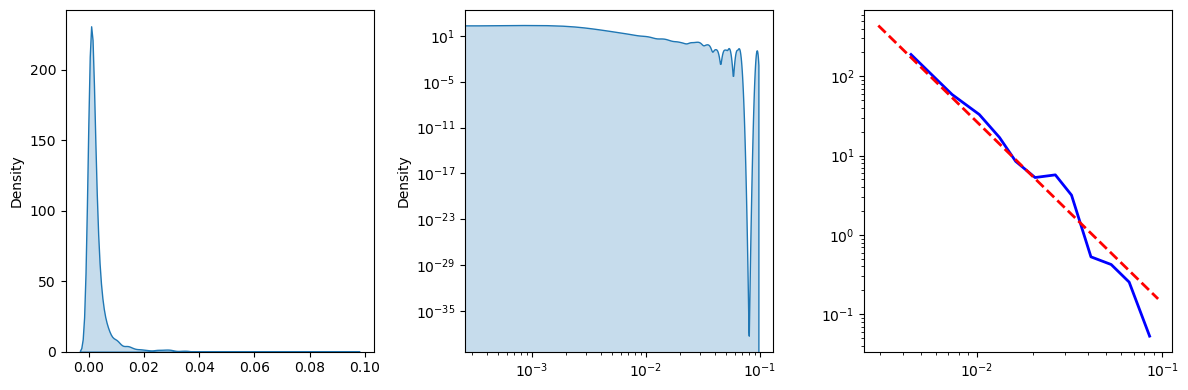

In [132]:
fig, axs = plt.subplots(figsize=(12, 4), ncols=3)
sns.kdeplot(data=np.abs(prec[start:end] - foll[start:end]), fill=True, common_norm=False, ax=axs[0])
sns.kdeplot(data=np.abs(prec[start:end] - foll[start:end]), fill=True, common_norm=False, ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_xscale('log')
results.plot_pdf(color='b', linewidth=2, ax=axs[2])
results.power_law.plot_pdf(color='r', linestyle='--', linewidth=2, ax=axs[2])
plt.tight_layout()

In [122]:
knn_monkey_1dt.npz sample_0
Calculating best minimal value for power law fit
xmin progress: 00%
Values less than or equal to 0 in data. Throwing out 0 or negative values
Alpha: 4.935175013932916
Xmin: 0.15009744798936842
Log-likelihood ratio (R): 13.238391120448496
P-value: 0.0207677856726921
    
    
knn_monkey_1dt.npz sample_2
Calculating best minimal value for power law fit
Alpha: 4.858318368574076
Xmin: 0.08190096758619109
Log-likelihood ratio (R): 18.92443817449615
P-value: 0.0024823251674516962
    
    
knn_monkey_1dt.npz sample_4
Calculating best minimal value for power law fit
Alpha: 4.708357130735552
Xmin: 0.10522102578365822
Log-likelihood ratio (R): -29.279198892358867
P-value: 3.1607794727854993e-07
    
    
    
knn_stringer_1dt_Krebs_20windowsize.npz sample_0
Calculating best minimal value for power law fit
Alpha: 2.338966008090971
Xmin: 2.0455571184797434
Log-likelihood ratio (R): 29.316086987592577
P-value: 0.003241023938817799
    
    
knn_stringer_1dt_Krebs_20windowsize_HPF.npz sample_0
Calculating best minimal value for power law fit
xmin progress: 07%
Values less than or equal to 0 in data. Throwing out 0 or negative values
xmin progress: 40%
xmin progress: 90%
Alpha: 2.8781464653264686
Xmin: 0.021867429871223212
Log-likelihood ratio (R): 31.572842943827524
P-value: 0.04473140711508732

SyntaxError: invalid syntax (1349844242.py, line 1)

In [116]:
results.power_law.KS()

0.04694723406372425

<AxesSubplot:>

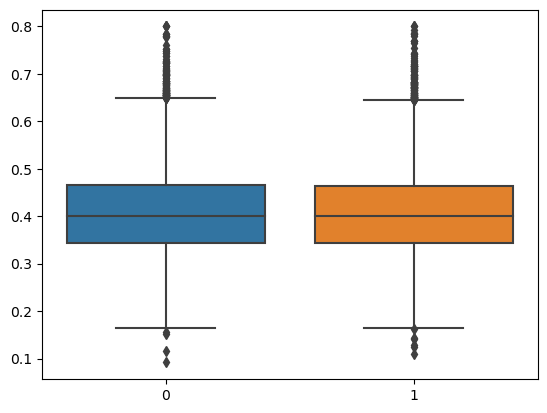

In [12]:
sns.boxplot(data=[d['sample_0'].item()['avg_min_dist_to_preceding'].squeeze(),
                 d['sample_0'].item()['avg_min_dist_to_following'].squeeze()])

In [7]:
d['sample_0'].item()['avg_min_dist_to_preceding'].shape

(1, 12320)